# Image Classification with Deep Learning - Pneumonia
Module 4 Project

Objective: Given a chest x-ray image of pediatric patients, build a model that can classify whether a given patient has pneumonia.

Goal: Build a deep neural network trained on a large dataset for classification on a non-trivial task.

# The Data
Imports and the dataset from Kaggle.

In [43]:
# Necessary libraries and classes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras import initializers
from keras import layers
from keras import regularizers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, MaxPooling2D, Dropout
from keras import optimizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import warnings 
warnings.filterwarnings('ignore')

## Uploading
Data was taken from <a href="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia">Kaggle</a>. To transfrom train data I used image augmentation to increase the 

In [44]:
# Directory path
train_data_dir = '/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/train'
test_data_dir = '/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/test'
val_data_dir = '/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/val'

# Get all the data the pneumonia train directory (5216 images), and reshape them
train_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    ).flow_from_directory(
        train_data_dir, 
        target_size=(224, 224), 
        batch_size=5216,
        class_mode='binary',
        shuffle=True,
        seed=42)

# Get all the data in the test directory (624 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(224, 224), 
        batch_size=624,
        class_mode='binary',
        shuffle=False)

# Get all the data in the validation directory (624 images), and reshape them
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(224, 224), 
        batch_size=16,
        class_mode='binary',
        shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Inspect the data

In [45]:
normal_train = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/train/NORMAL/*.jpeg')
pneu_train = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/train/PNEUMONIA/*.jpeg')
normal_test = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/test/NORMAL/*.jpeg')
pneu_test = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/test/PNEUMONIA/*.jpeg')
normal_val = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/val/NORMAL/*.jpeg')
pneu_val = glob.glob('/Users/shirlwilliams/Documents/Coursework/Data Science/mod4 project/chest_xray 2/val/PNEUMONIA/*.jpeg')

print(len(normal_train), len(pneu_train), len(normal_test), len(pneu_test), len(normal_val), len(pneu_val))

1341 3875 234 390 8 8


### Transform the data to matrices

In [46]:
# Transform each matrix to 2D
train_img_unrow = train_images.reshape(-1, 5216).T
test_img_unrow = test_images.reshape(-1, 624).T
val_img_unrow = test_images.reshape(-1, 16).T

print(np.shape(train_img_unrow))
print(np.shape(test_img_unrow))
print(np.shape(val_img_unrow))

(5216, 150528)
(624, 150528)
(16, 5870592)


## Function to Graph Results

In [47]:
def graph_models(model):
    # model1 details
    model_dict = model.history
    model_acc_values = model_dict['acc'] 
    model_loss_values = model_dict['loss']

    # Plot the accuracy and loss for these models
    fig1, ax = plt.subplots(2, figsize=(10, 12))
    epochs = range(1, len(model_acc_values) + 1)

    # Training Accuracy
    ax[0].plot(epochs, model_acc_values, 'b', label= 'Training Accuracy')
    ax[0].set_title('Training Accuracy and Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend();

    # Training Loss
    ax[1].plot(epochs, model_loss_values, 'g', label= 'Training Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend();
    plt.show()

# Baseline Model
Bare bones baseline model using a neural network.

In [37]:
# Initialize the classifier
classifier = Sequential()

# Adding the layers
classifier.add(Dense(units = 16, activation='relu', input_dim=150528))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 6, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

# Compile the function with optimizer and loss
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Baseline model 
model1 = classifier.fit(train_img_unrow, train_labels, batch_size=10, epochs=25)

Epoch 1/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9710 - acc: 0.2573
Epoch 2/25
5216/5216 [==============================] - 24s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 3/25
5216/5216 [==============================] - 24s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 4/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 5/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 6/25
5216/5216 [==============================] - 26s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 7/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 8/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 9/25
5216/5216 [==============================] - 26s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 10/25
5216/5216 [==============================] - 27s 5ms/step - loss: 11.9742 - acc: 0.2571
Epoch 11/

KeyboardInterrupt: 

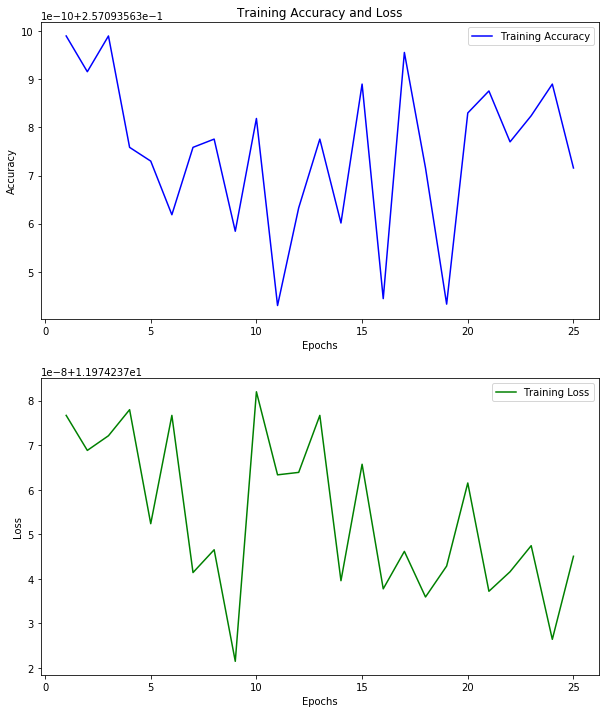

In [14]:
# Graph model results
graph_models(model1)

## Results of Baseline Model

In [15]:
# Model evaluation of the training as test data
results_train = classifier.evaluate(train_img_unrow, train_labels)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

results_test = classifier.evaluate(test_img_unrow, test_labels)
print('----------')
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

5216/5216 [==============================] - 20s 4ms/step
----------
Training Loss: 12.0 
Training Accuracy: 0.257
624/624 [==============================] - 1s 2ms/step
----------
Test Loss: 10.1 
Test Accuracy: 0.375


## The baseline model showed poor results
Apparantly a neural network isn't the model that will provide needed results

# Weighted Model

In [16]:
# Define weights to balance classes
weights = {0:3, 1:1}

In [17]:
# Initialize the classifier
classifier = Sequential()

# Adding the layers
classifier.add(Dense(units = 16, activation='relu', input_dim=150528))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 6, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

# Compile the function with optimizer and loss
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Baseline model 
model1 = classifier.fit(train_img_unrow, train_labels, class_weight=weights, batch_size=10, epochs=25)

Epoch 1/25
5216/5216 [==============================] - 30s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 2/25
5216/5216 [==============================] - 30s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 3/25
5216/5216 [==============================] - 31s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 4/25
5216/5216 [==============================] - 31s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 5/25
5216/5216 [==============================] - 31s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 6/25
5216/5216 [==============================] - 31s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 7/25
5216/5216 [==============================] - 33s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 8/25
5216/5216 [==============================] - 33s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 9/25
5216/5216 [==============================] - 33s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 10/25
5216/5216 [==============================] - 32s 6ms/step - loss: 11.9742 - acc: 0.2571
Epoch 11/

In [39]:
# Initialize the classifier
#classifier = Sequential()

# Use of CNN
model2 = Sequential([
                         Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(5216, 150528)),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(16, kernel_size=(5, 5), activation='relu'),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Flatten(),
                         Dense(120, activation='relu'),
                         Dense(84, activation='relu'),
                         Dense(10, activation='softmax')
                         ])

# Compile the function with optimizer and loss
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2 = classifier.fit(train_img, 
                        train_labels, 
                        class_weight=weights,
                        epochs=25, 
                        batch_size=8)

# # Compile the function with optimizer and loss
# classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# # Baseline model 
# model2 = classifier.fit(train_img_unrow, train_labels, class_weight=weights, batch_size=10, epochs=15)

ValueError: Input 0 is incompatible with layer conv2d_27: expected ndim=4, found ndim=3

# Model with dropout layers

In [ ]:
classifier = Sequential()

# Implement dropout to the input layer
classifier.add(layers.Dense(32, activation='relu', input_dim=196608))
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Dense(16, activation='relu'))
# Implement dropout to the first hidden layer 
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Dense(8, activation='relu'))
# Implement dropout to the second hidden layer 
classifier.add(layers.Dropout(0.3))
classifier.add(layers.Dense(1, activation='sigmoid'))
# Compile the model
classifier.compile(optimizer='rmsprop', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# Train the model
model3 = classifier.fit(train_img_unrow, 
                        train_labels, 
                        class_weight=weights,
                        epochs=15, 
                        batch_size=10)

In [21]:
print(train_images.shape, train_labels.shape)

(5216, 224, 224, 3) (5216,)


# CNN Model

In [40]:
# add layers with Conv2D, MaxPolling2D, and Flattening
classifier = Sequential([
                         Conv2D(8, kernel_size=(4, 4), activation='relu', padding='same',input_shape=train_images.shape[1:]),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu'),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Dropout(0.3),
                         Flatten(),
                         Dense(16, activation='relu'),
                         Dropout(0.3),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model4 = classifier.fit(train_images, 
                        train_labels, 
                        class_weight=weights,
                        epochs=50, 
                        batch_size=10)

Epoch 1/50
5216/5216 [==============================] - 95s 18ms/step - loss: 12.2869 - acc: 0.7431
Epoch 2/50
5216/5216 [==============================] - 94s 18ms/step - loss: 12.2961 - acc: 0.7429
Epoch 3/50
5216/5216 [==============================] - 100s 19ms/step - loss: 12.2961 - acc: 0.7429
Epoch 4/50
5216/5216 [==============================] - 97s 19ms/step - loss: 12.2961 - acc: 0.7429
Epoch 5/50
5216/5216 [==============================] - 95s 18ms/step - loss: 12.2873 - acc: 0.7431
Epoch 6/50
5216/5216 [==============================] - 101s 19ms/step - loss: 12.2961 - acc: 0.7429
Epoch 7/50
5216/5216 [==============================] - 96s 18ms/step - loss: 2.8976 - acc: 0.3623
Epoch 8/50
5216/5216 [==============================] - 95s 18ms/step - loss: 1.0068 - acc: 0.3426
Epoch 9/50
5216/5216 [==============================] - 101s 19ms/step - loss: 0.8604 - acc: 0.6411
Epoch 10/50
5216/5216 [==============================] - 99s 19ms/step - loss: 0.7662 - acc: 0.8269


## Model Results

In [ ]:
# Graph model results
graph_models(model4)

In [ ]:
# test predictions
test_preds = classifier.predict_classes(test_images)
# convert to a 1D array
test_preds = test_preds[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, test_preds)
print('Accuracy: \t%.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, test_preds)
print('Precision: \t%.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, test_preds)
print('Recall: \t%.2f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, test_preds)
print('F1 score: \t%.2f' % f1)